Center coordinates: (92, 92)
Pixel value at the center (BGR): [ 67  92 172]
Pixel value at the center of the patch: [168 158  50]


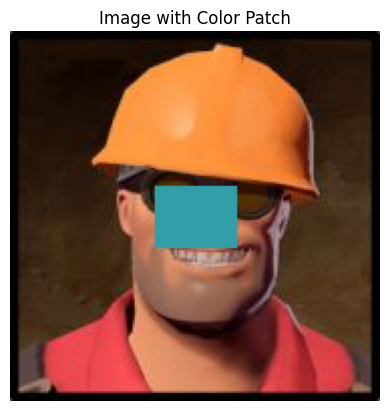

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("tf2_engineer.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape
yc, xc = h // 2, w // 2
print(f"Center coordinates: ({yc}, {xc})")
print("Pixel value at the center (BGR):", img[yc, xc])
patch_color = (168, 158, 50)
top_left = (xc - 20, yc - 15)
bottom_right = (xc + 20, yc + 15)
cv2.rectangle(img, top_left, bottom_right, patch_color, thickness=-1)
print("Pixel value at the center of the patch:", img[yc, xc])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Image with Color Patch")
plt.axis("off")
plt.show()

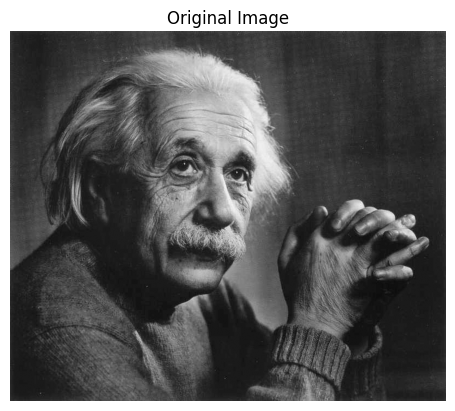

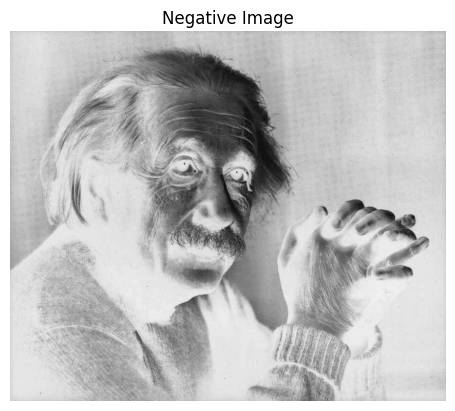

Pixel comparisons (Original vs Negative):
Pixel at (243, 774): Original = 102, Negative = 153
Pixel at (552, 671): Original = 109, Negative = 146
Pixel at (391, 21): Original = 106, Negative = 149
Pixel at (404, 235): Original = 98, Negative = 157
Pixel at (29, 400): Original = 107, Negative = 148


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

einstein_img = cv2.imread("einstein.tif", cv2.IMREAD_GRAYSCALE)
if einstein_img is None:
    print("Resim bulunamadı. Dosya adını ve yolunu kontrol edin.")
else:
    plt.imshow(einstein_img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
    negative = 255 - einstein_img
    plt.imshow(negative, cmap='gray')
    plt.title("Negative Image")
    plt.axis('off')
    plt.show()
    height, width = einstein_img.shape
    coords = [(random.randint(0, height - 1), random.randint(0, width - 1)) for _ in range(5)]

    print("Pixel comparisons (Original vs Negative):")
    for y, x in coords:
        orig_val = einstein_img[y, x]
        neg_val = negative[y, x]
        print(f"Pixel at ({y}, {x}): Original = {orig_val}, Negative = {neg_val}")

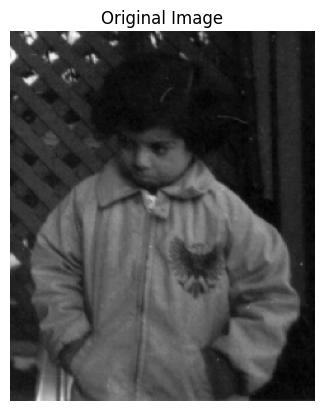

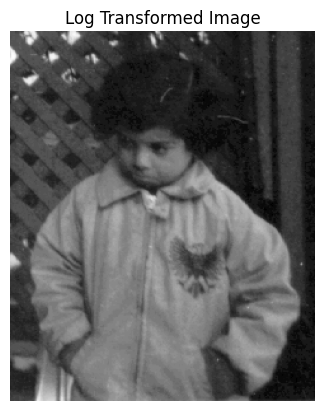

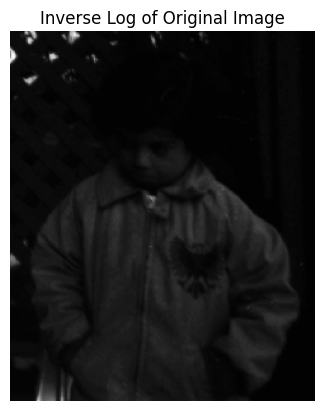

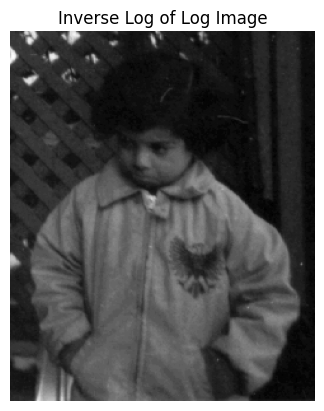

Log transform makes dark areas easier to see.
Using log and then inverse log gives an image close to the original.


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Can't find the image")
else:
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
    img_float = image.astype(np.float32)
    c = 255 / np.log(1 + np.max(img_float))
    log_img = c * np.log(1 + img_float)
    log_img = np.uint8(np.clip(log_img, 0, 255))

    plt.imshow(log_img, cmap='gray')
    plt.title("Log Transformed Image")
    plt.axis('off')
    plt.show()

    inv_log_img = np.exp(img_float / c) - 1
    inv_log_img = np.uint8(np.clip(inv_log_img, 0, 255))

    plt.imshow(inv_log_img, cmap='gray')
    plt.title("Inverse Log of Original Image")
    plt.axis('off')
    plt.show()


    log_float = log_img.astype(np.float32)
    rev_img = np.exp(log_float / c) - 1
    rev_img = np.uint8(np.clip(rev_img, 0, 255))

    plt.imshow(rev_img, cmap='gray')
    plt.title("Inverse Log of Log Image")
    plt.axis('off')
    plt.show()

    print("Log transform makes dark areas easier to see.")
    print("Using log and then inverse log gives an image close to the original.")

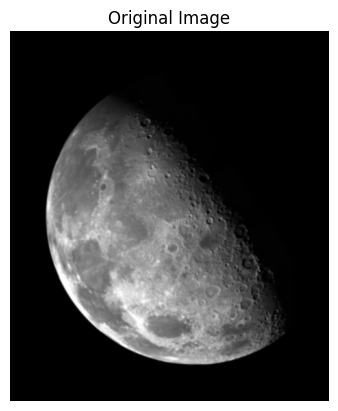

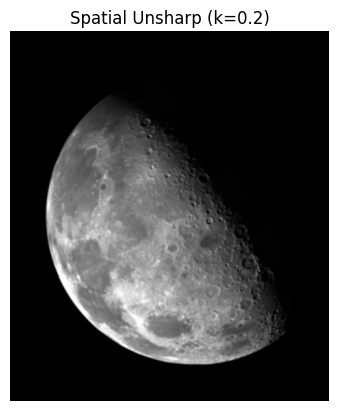

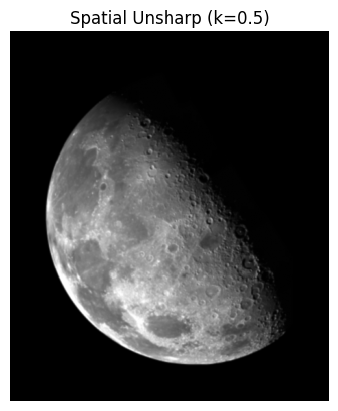

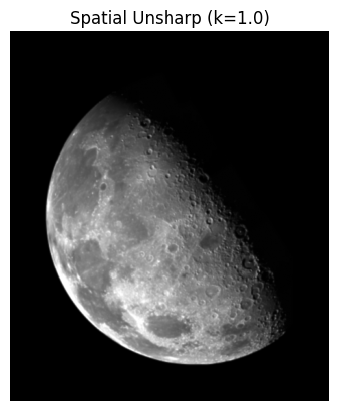

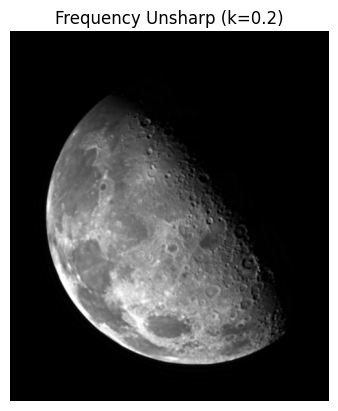

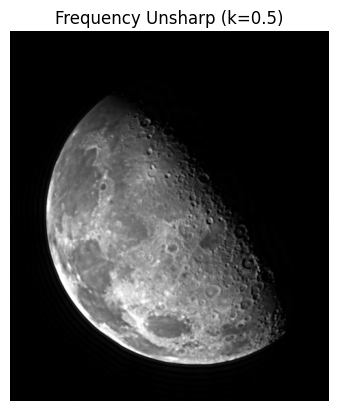

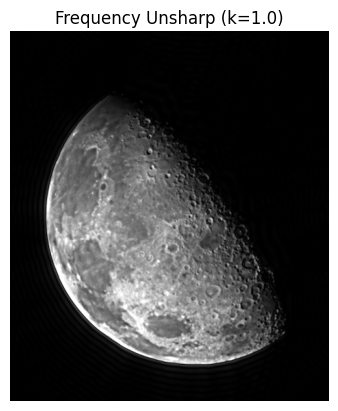

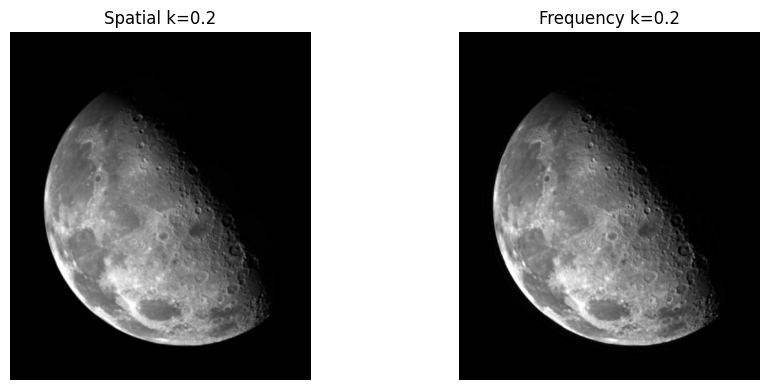

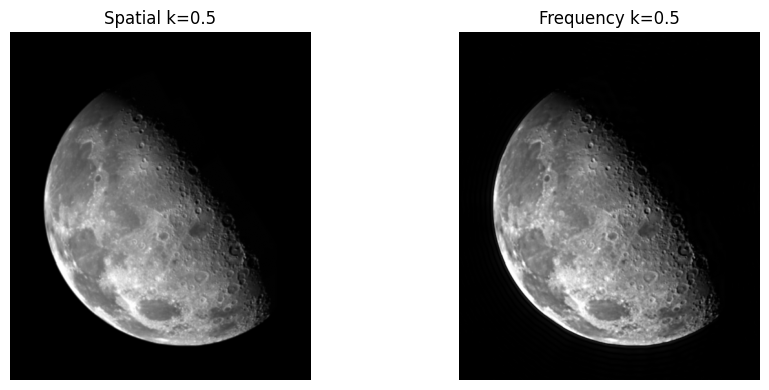

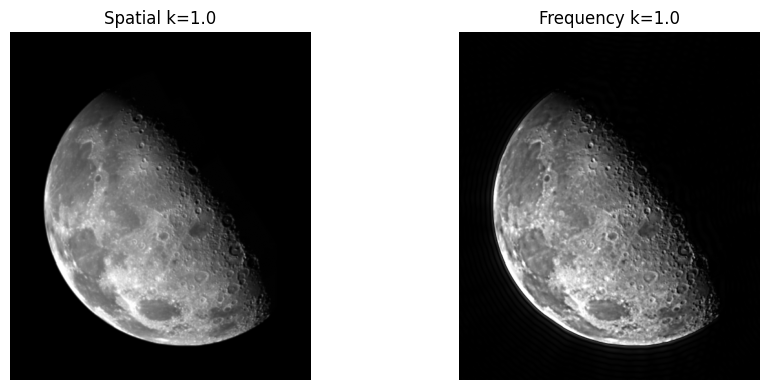

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread("moon.tif", cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Can't find the image")
else:
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
    def unsharp_spatial(image, k):
        blurred = cv2.GaussianBlur(image, (5, 5), 0)
        mask = cv2.subtract(image, blurred)
        sharpened = cv2.addWeighted(image, 1.0, mask, k, 0)
        return sharpened

    k_values = [0.2, 0.5, 1.0]
    spatial_results = []

    for k in k_values:
        result = unsharp_spatial(image, k)
        spatial_results.append(result)
        plt.imshow(result, cmap='gray')
        plt.title(f"Spatial Unsharp (k={k})")
        plt.axis('off')
        plt.show()
    def high_pass_filter(shape, D0):
        rows, cols = shape
        crow, ccol = rows // 2, cols // 2
        H = np.zeros((rows, cols), dtype=np.float32)
        for u in range(rows):
            for v in range(cols):
                D = np.sqrt((u - crow)**2 + (v - ccol)**2)
                H[u, v] = 1 if D >= D0 else 0
        return H

    def unsharp_frequency(img, k, D0):
        dft = np.fft.fft2(img)
        dft_shift = np.fft.fftshift(dft)
        H = high_pass_filter(img.shape, D0)
        H_unsharp = 1 + k * H
        result_shift = dft_shift * H_unsharp
        result = np.fft.ifftshift(result_shift)
        img_back = np.fft.ifft2(result)
        img_back = np.abs(img_back)
        return np.uint8(np.clip(img_back, 0, 255))

    freq_results = []

    for k in k_values:
        result = unsharp_frequency(image, k, D0=30)
        freq_results.append(result)
        plt.imshow(result, cmap='gray')
        plt.title(f"Frequency Unsharp (k={k})")
        plt.axis('off')
        plt.show()
    for i, k in enumerate(k_values):
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        axs[0].imshow(spatial_results[i], cmap='gray')
        axs[0].set_title(f"Spatial k={k}")
        axs[1].imshow(freq_results[i], cmap='gray')
        axs[1].set_title(f"Frequency k={k}")
        for ax in axs:
            ax.axis('off')
        plt.tight_layout()
        plt.show()

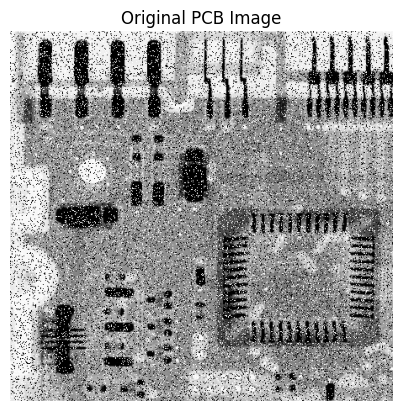

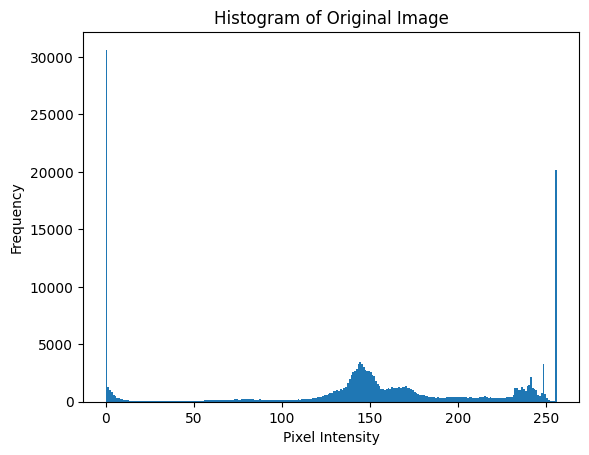

We can find the noise type by looking at the image and its histogram.


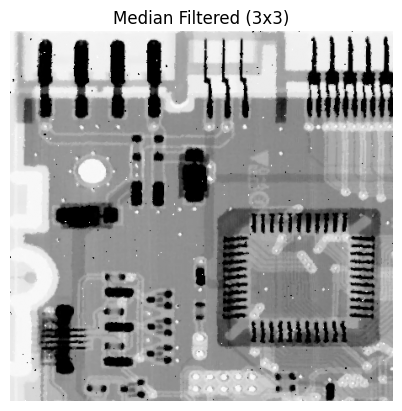

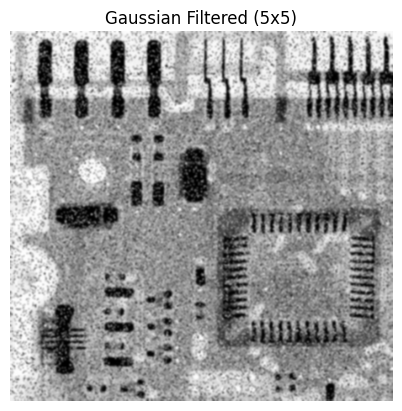

Median filter is good for removing salt-and-pepper noise.
Gaussian filter reduces random noise by smoothing the image.


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("pcb.tif", cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Can't find the.")
else:
    plt.imshow(image, cmap='gray')
    plt.title("Original PCB Image")
    plt.axis('off')
    plt.show()


    plt.hist(image.ravel(), bins=256, range=(0, 256))
    plt.title("Histogram of Original Image")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

    print("We can find the noise type by looking at the image and its histogram.")

    median_filtered = cv2.medianBlur(image, 3)
    plt.imshow(median_filtered, cmap='gray')
    plt.title("Median Filtered (3x3)")
    plt.axis('off')
    plt.show()

    gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 0)
    plt.imshow(gaussian_filtered, cmap='gray')
    plt.title("Gaussian Filtered (5x5)")
    plt.axis('off')
    plt.show()

    print("Median filter is good for removing salt-and-pepper noise.")
    print("Gaussian filter reduces random noise by smoothing the image.")

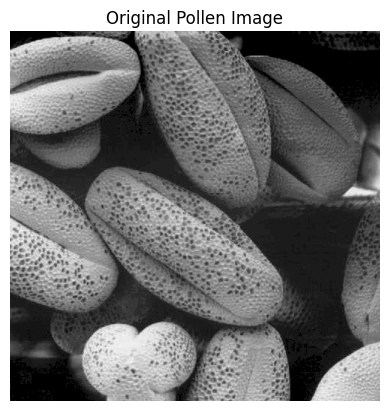

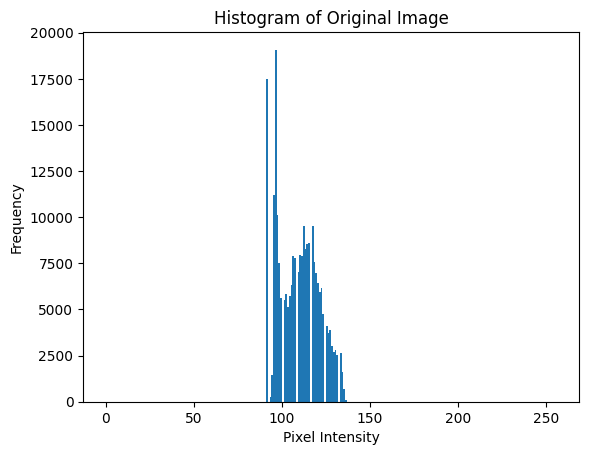

Average brightness: 109.08
Standard deviation: 11.49
The image may have low contrast and look blurry.


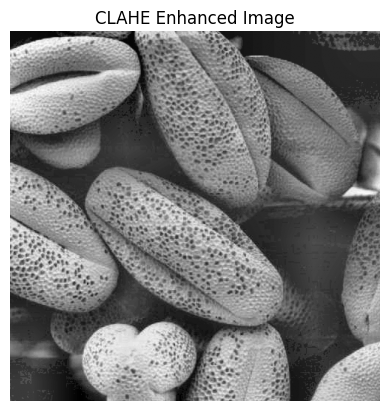

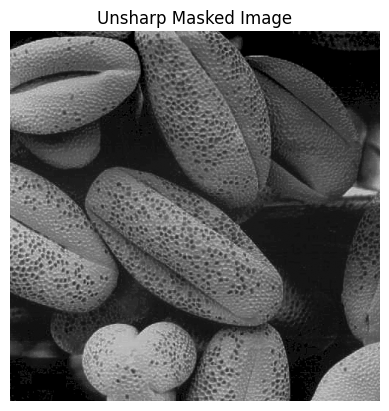


Method Comparison (Mean & Std):
Original   - Mean: 109.08, Std: 11.49
CLAHE      - Mean: 113.48, Std: 22.57
Unsharp    - Mean: 109.81, Std: 12.10

CLAHE increases low contrast, and unsharp masking makes details clearer.


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread("pollen.tif", cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Can't find he image")
else:
    plt.imshow(image, cmap='gray')
    plt.title("Original Pollen Image")
    plt.axis('off')
    plt.show()
    plt.hist(image.ravel(), bins=256, range=(0, 256))
    plt.title("Histogram of Original Image")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()
    mean_val = np.mean(image)
    std_val = np.std(image)
    print(f"Average brightness: {mean_val:.2f}")
    print(f"Standard deviation: {std_val:.2f}")
    print("The image may have low contrast and look blurry.")

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_clahe = clahe.apply(image)

    plt.imshow(img_clahe, cmap='gray')
    plt.title("CLAHE Enhanced Image")
    plt.axis('off')
    plt.show()
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    mask = cv2.subtract(image, blurred)
    sharpened = cv2.addWeighted(image, 1.0, mask, 1.5, 0)

    plt.imshow(sharpened, cmap='gray')
    plt.title("Unsharp Masked Image")
    plt.axis('off')
    plt.show()

    print("\nMethod Comparison (Mean & Std):")
    print(f"Original   - Mean: {np.mean(image):.2f}, Std: {np.std(image):.2f}")
    print(f"CLAHE      - Mean: {np.mean(img_clahe):.2f}, Std: {np.std(img_clahe):.2f}")
    print(f"Unsharp    - Mean: {np.mean(sharpened):.2f}, Std: {np.std(sharpened):.2f}")
    print("\nCLAHE increases low contrast, and unsharp masking makes details clearer.")